# Iris dataset

## Data collection 

In [49]:
!pip install seaborn

  Using cached Pillow-7.2.0-cp36-cp36m-win_amd64.whl (2.0 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp36-none-win_amd64.whl (57 kB)


In [116]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression

In [41]:
iris = datasets.load_iris()

In [42]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [60]:
iris_df = pd.concat([pd.DataFrame(iris.data), pd.DataFrame(iris.target)], axis=1)
iris_df.columns = iris.feature_names + ['species']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [61]:
iris_df['species_name'] = iris_df['species'].replace([0,1,2], iris.target_names.tolist())
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Data Exploration

In [62]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [63]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   species_name       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [65]:
iris_df['species_name'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species_name, dtype: int64

<AxesSubplot:xlabel='species_name', ylabel='count'>

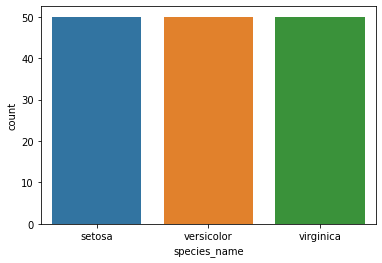

In [64]:
sns.countplot(x='species_name',data=iris_df)

<AxesSubplot:>

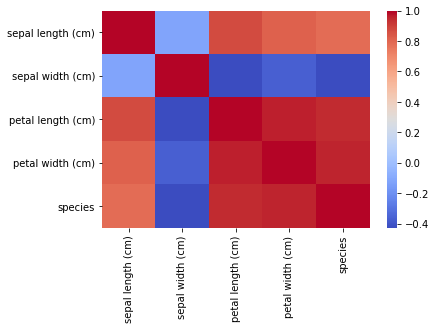

In [67]:
sns.heatmap(iris_df.corr(), cmap='coolwarm')

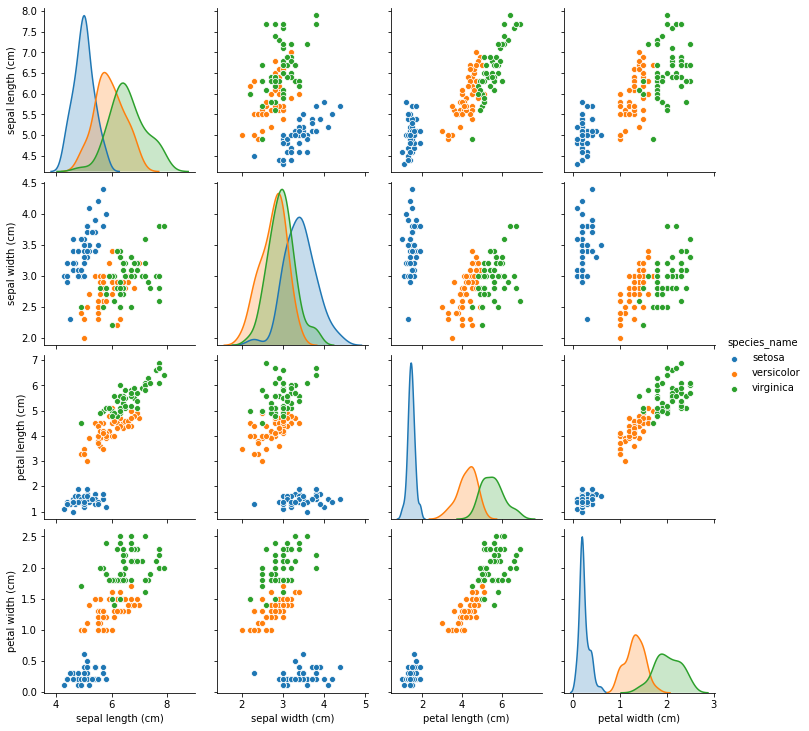

In [56]:
sns.pairplot(iris_df.drop(columns=['species']), hue='species_name')

##  Data Preprocessing

In [70]:
X = iris_df.iloc[:, :4]
y = iris_df['species']

In [101]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.3,stratify=y)

## Data Modelling

### Logistic Regression

In [122]:
log = LogisticRegression()
log.fit(X=X_train, y=y_train)
log_predict = log.predict(X_test)
print('Accuracy :',metrics.accuracy_score(log_predict, y_test))
print('Confusion matrix:\n',metrics.confusion_matrix(log_predict, y_test))

Accuracy : 0.9555555555555556
Confusion matrix:
 [[15  0  0]
 [ 0 13  0]
 [ 0  2 15]]
